In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn

#stats
from scipy import stats

#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [45]:
flights_df = sns.load_dataset('flights')
flights_df.head()


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [46]:
# pivot th edata
flights_df = flights_df.pivot('month', 'year', 'passengers')
flights_df.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


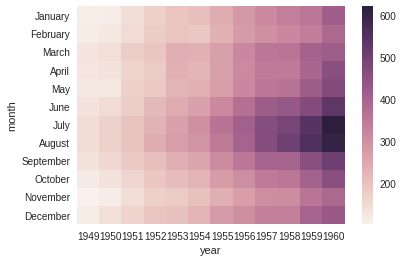

In [47]:
sns.heatmap(flights_df)

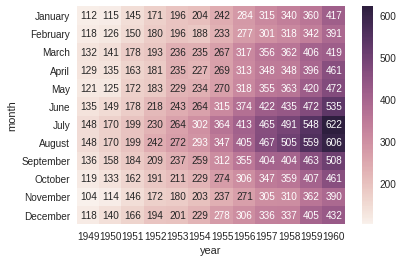

In [48]:
sns.heatmap(flights_df, annot=True, fmt='d')

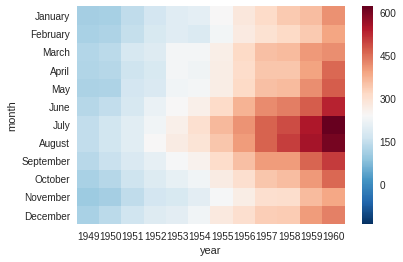

In [49]:
sns.heatmap(flights_df, center=flights.loc['January', 1955])

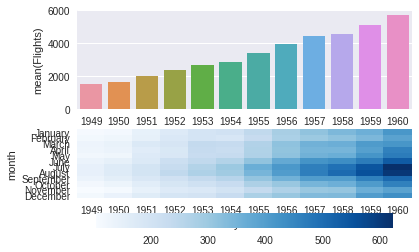

In [52]:
# heatmap() can be used on an axes for a subplot to create more informative figures
f, (axis1,axis2) = plt.subplots(2,1)

yearly_flights = flights_df.sum()

# Since yearly_flights is a weird format, we'll have to grab the values we want with a Series, then put them in a dframe

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values) 
flights = pd.DataFrame(flights)

# Make the dframe and name columns
year_dframe = pd.concat((years,flights),axis=1)
year_dframe.columns = ['Year','Flights']



# Create the bar plot on top
sns.barplot('Year',y='Flights',data=year_dframe, ax = axis1)

# Create the heatmap on bottom
sns.heatmap(flights_df,cmap='Blues',ax=axis2,cbar_kws={"orientation": "horizontal"})

/home/zahid/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


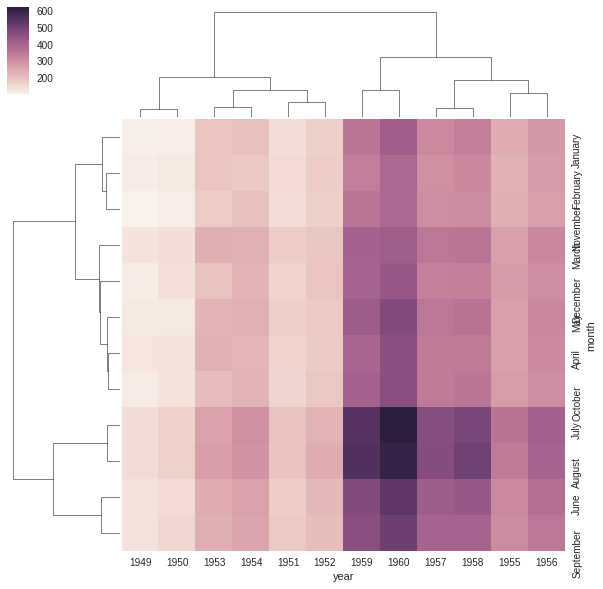

In [53]:
# Clustermap will reformat the heatmap so similar rows are next to each other
sns.clustermap(flights_df)

/home/zahid/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


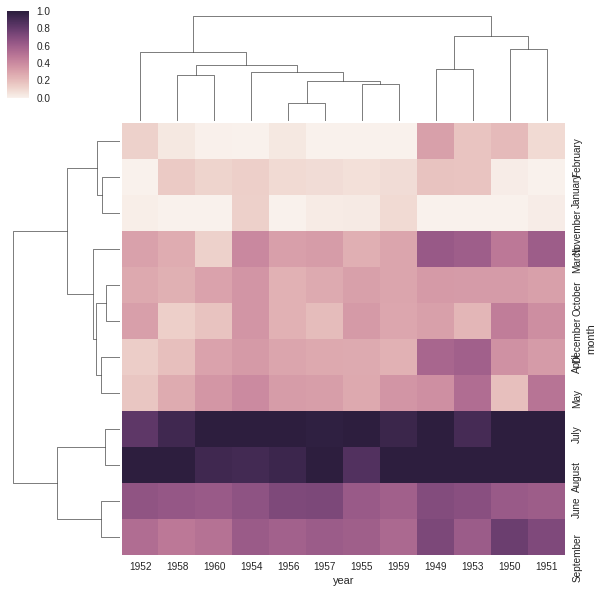

In [55]:
# Since the number of flights increase every year, we should set a standard scale
sns.clustermap(flights_df,standard_scale=1) # standardize by columns (year)

/home/zahid/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


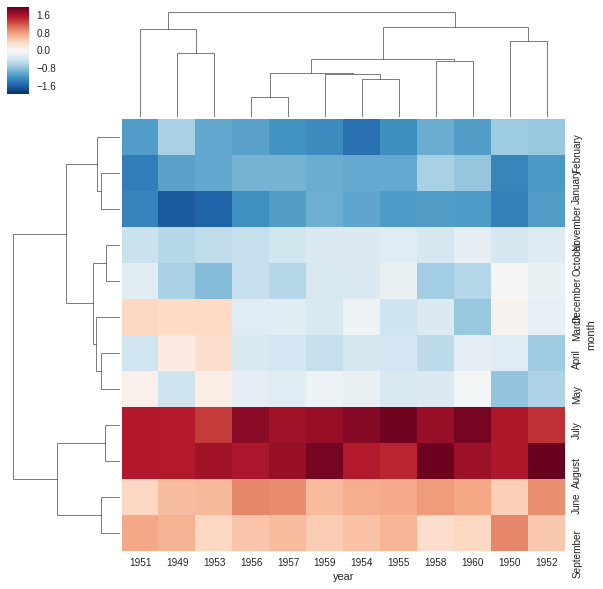

In [57]:
# This subtracts the mean and devides by the STD of each column, then teh rows have amean of 0 and a variance of 1
sns.clustermap(flights_df,z_score=1)